In [425]:
'''
Red Wine Quality + White Wine Quality 데이터셋을 합쳐서 Linear Regression을 실시하세요.

10-Cross Validation 사용
3가지 이상의 다른 Regression 알고리즘을 사용해서 모델 학습, 각 학습의 평가 -> 가장 좋은 모델 찾기
'''

'\nRed Wine Quality + White Wine Quality 데이터셋을 합쳐서 Linear Regression을 실시하세요.\n\n10-Cross Validation 사용\n3가지 이상의 다른 Regression 알고리즘을 사용해서 모델 학습, 각 학습의 평가 -> 가장 좋은 모델 찾기\n'

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

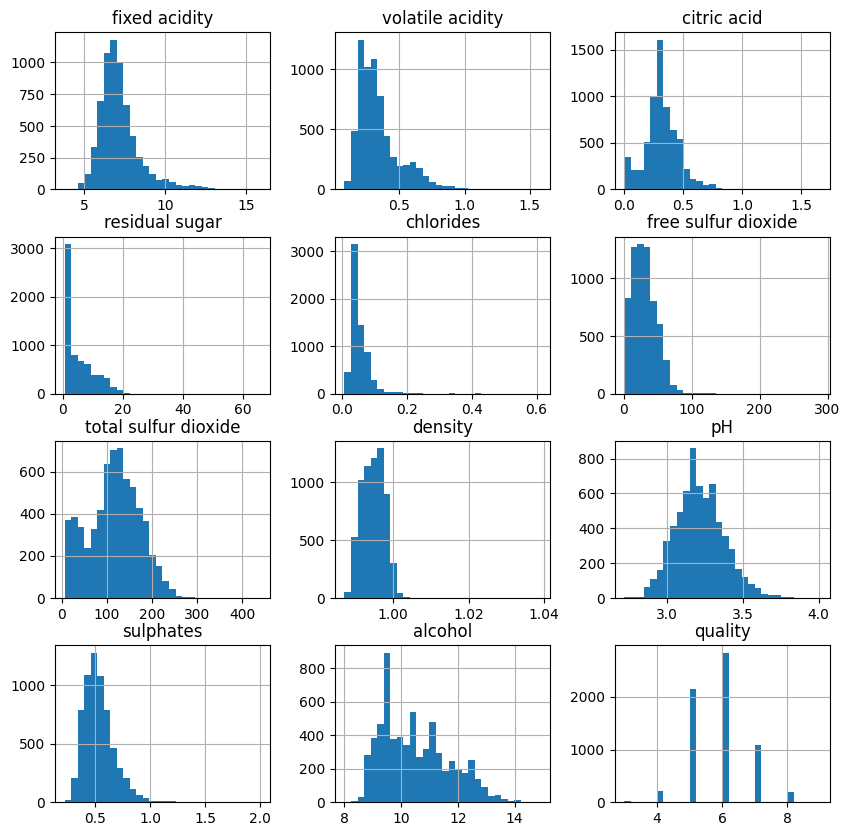

In [426]:
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt


# csv 파일 읽어오기
# 데이터 합치는 전처리
red_wine = pd.read_csv('./winequality-red.csv')
white_wine = pd.read_csv('./winequality-white.csv', sep=';')
red_wine= pd.concat([red_wine,white_wine], axis=0)
red_wine.hist(bins=30, figsize=(10,10))


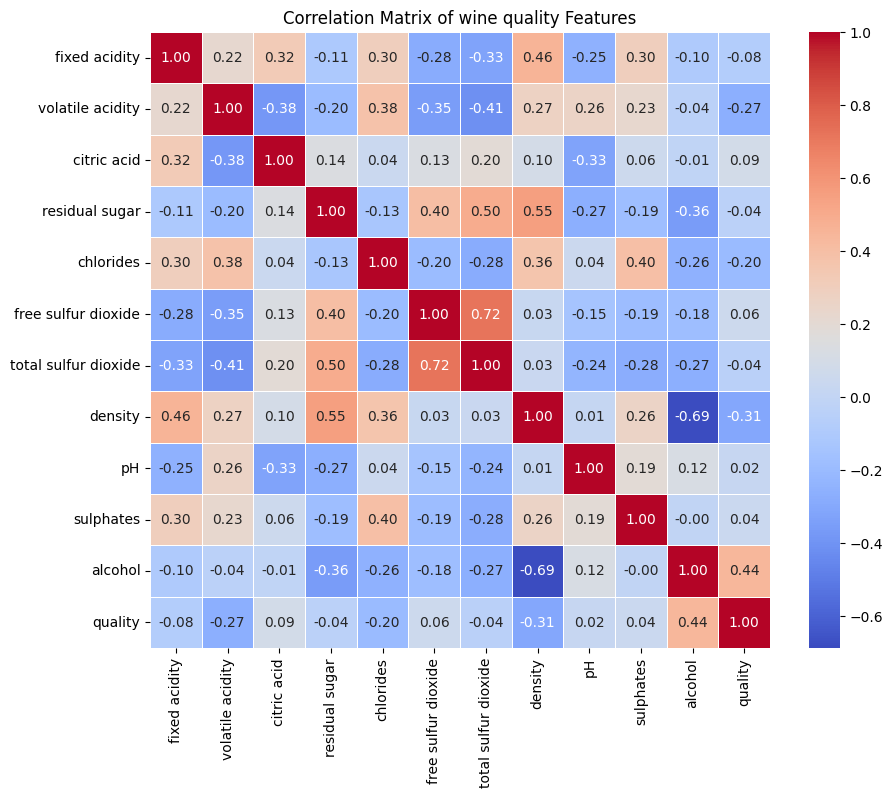

In [427]:
import seaborn as sns 
import matplotlib.pyplot as plt 
# 2. 상관관계 계산
correlation_matrix = red_wine.corr()
# 3. 상관관계 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of wine quality Features')
plt.show()

# 알코올과 품질의 상관관계가 높다고 보임

Mean Squared Error (MSE): 0.5284386562351935
Mean Absolute Error (MAE): 0.566834273375528
Root Mean Squared Error (RMSE): 0.7269378627057429
5.79


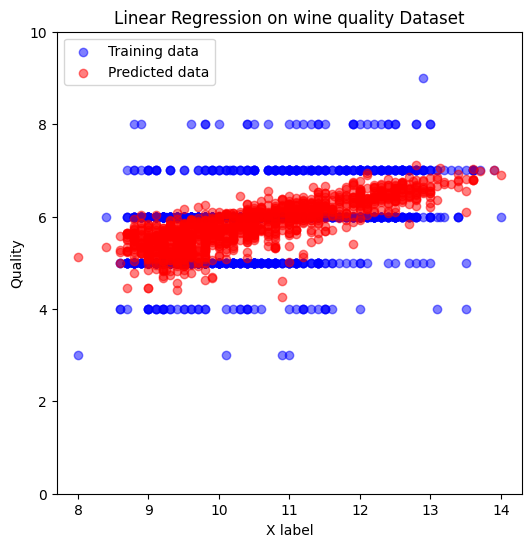

In [428]:
column_names = [
    'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol', 'quality'
]
y = red_wine['quality']
X = red_wine.drop('quality', axis=1)
red_wine

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LinearRegression
# 3. 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 모델 예측
y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, mean_absolute_error
# 5. 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

# 평균적으로 quality는 0.7의 오차를 가짐
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 품질 평균은 5.79
print(y_test.mean())

# 6. 시각화 (첫 번째 특성에 대해서만 시각화)
plt.figure(figsize=(6, 6))

# 실제 값과 예측 값 비교
# 학습 데이터 산점도
plt.scatter(X_test.iloc[:, 10], y_test, color='blue', label='Training data', alpha=0.5)
# 테스트 데이터 산점도
plt.scatter(X_test.iloc[:, 10], y_pred, color='red', label='Predicted data', alpha=0.5)

plt.xlabel('X label')
plt.ylabel('Quality')
plt.title('Linear Regression on wine quality Dataset')

# 세로 축의 최대값을 10으로 설정
plt.ylim(0, 10)

plt.legend()
plt.show()

# 알코올과 품질 사이의 상관관계 분석

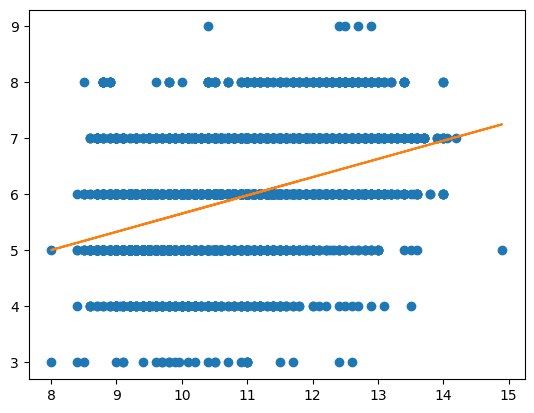

In [429]:
X = red_wine['alcohol']
Y = red_wine['quality']
plt.plot(X,Y, 'o')


line_filtter = LinearRegression()
line_filtter.fit(X.values.reshape(-1,1),y)
plt.plot(X, line_filtter.predict(X.values.reshape(-1,1)))
plt.show()

degree:  2
real alcohol :  [9.4]
poly :  [ 9.4  88.36]
intercept :  5.3635261576592494 , coef: [-0.22829467  0.02556115]
Mean Squared Error (MSE): 0.6104165413640712
Mean Absolute Error (MAE): 0.6216511105760523
Root Mean Squared Error (RMSE): 0.7812915853662262




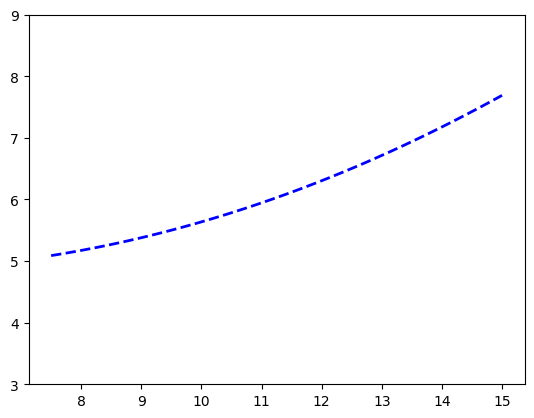

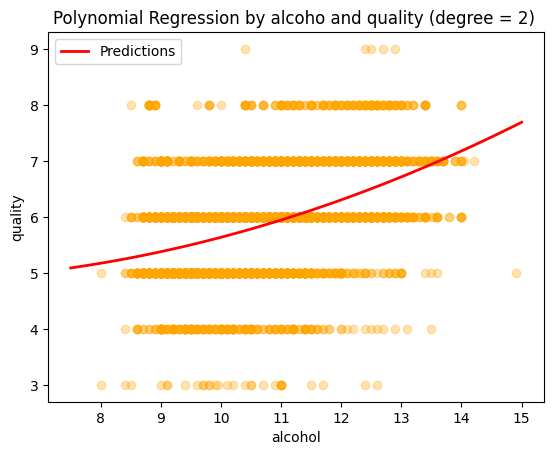

In [430]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


column_names = [
    'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol', 'quality'
]
y = red_wine['quality']
X = red_wine.drop('quality', axis=1)
red_wine

from sklearn.model_selection import train_test_split


alco = []
qual = []

alco.extend(red_wine['alcohol'])
qual.extend(red_wine['quality'])

# PolynomialFeatures에 맞게 데이터변형
alco_real =np.reshape(alco,(-1, 1))
# 2차 다항식으로
user_degree = 2
print('degree: ', user_degree)


# x 에 대한 제곱근 (다항식 형태로 변환)
poly_features  = PolynomialFeatures(degree=user_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(alco_real)

print('real alcohol : ',alco_real[0])
print('poly : ',X_train_poly[0])



#다항 회귀 예측
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, qual)
print('intercept : ',lin_reg.intercept_,', coef:' , lin_reg.coef_)

X_new=np.linspace(7.5, 15, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)

y_new = 5.3635261576592494+(X_new*-0.228294670)+(.02556115*X_new**2)
plt.plot(X_new,  y_new, "b--", linewidth=2, label="Predictions")
plt.ylim(3, 9)
# y_new = lin_reg.predict(X_new_poly)

# 성능 평가
y_pred = lin_reg.predict(X_train_poly)
mse = mean_squared_error(qual, y_pred)
mae = mean_absolute_error(qual, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

print('\n')
plt.figure()
plt.scatter(alco, qual, alpha=0.3, color ="orange")



plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.title('Polynomial Regression by alcoho and quality (degree = %d) '%user_degree) 
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.legend(loc="upper left")
plt.show()


# 절편은 5.3
# 기울기는 0.22, 0.02

In [432]:
from sklearn.model_selection import KFold

# 2. 10개로 나눔
kf = KFold(n_splits=10, shuffle=True, random_state=1)

mse_scores = []
mae_scores = []
rmse_scores = []

# 3. 교차 검증 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 모델 학습
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 모델 예측
    y_pred = model.predict(X_test)

    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# 평균 및 표준편차 계산
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'10-Fold Cross-Validated Mean Squared Error (MSE): {mean_mse:.2f} ± {std_mse:.2f}')
print(f'10-Fold Cross-Validated Mean Absolute Error (MAE): {mean_mae:.2f} ± {std_mae:.2f}')
print(f'10-Fold Cross-Validated Root Mean Squared Error (RMSE): {mean_rmse:.2f} ± {std_rmse:.2f}')

# 4. 최종 모델 학습 및 예측 (전체 데이터를 사용하여 학습)
model.fit(X, y)
y_pred = model.predict(X)

10-Fold Cross-Validated Mean Squared Error (MSE): 0.54 ± 0.05
10-Fold Cross-Validated Mean Absolute Error (MAE): 0.57 ± 0.02
10-Fold Cross-Validated Root Mean Squared Error (RMSE): 0.74 ± 0.03



Mean Squared Error (MSE): 0.5284386562351935
Mean Absolute Error (MAE): 0.566834273375528
Root Mean Squared Error (RMSE): 0.7269378627057429



Mean Squared Error (MSE): 0.6104165413640712
Mean Absolute Error (MAE): 0.6216511105760523
Root Mean Squared Error (RMSE): 0.7812915853662262

다항의 결정계수가 제일 높음 78



10-Fold Cross-Validated Mean Squared Error (MSE): 0.54 ± 0.05
10-Fold Cross-Validated Mean Absolute Error (MAE): 0.57 ± 0.02
10-Fold Cross-Validated Root Mean Squared Error (RMSE): 0.74 ± 0.03